C:\Users\TGDD\AppData\Local\Temp\ipykernel_12704\995558319.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("variety", 1)


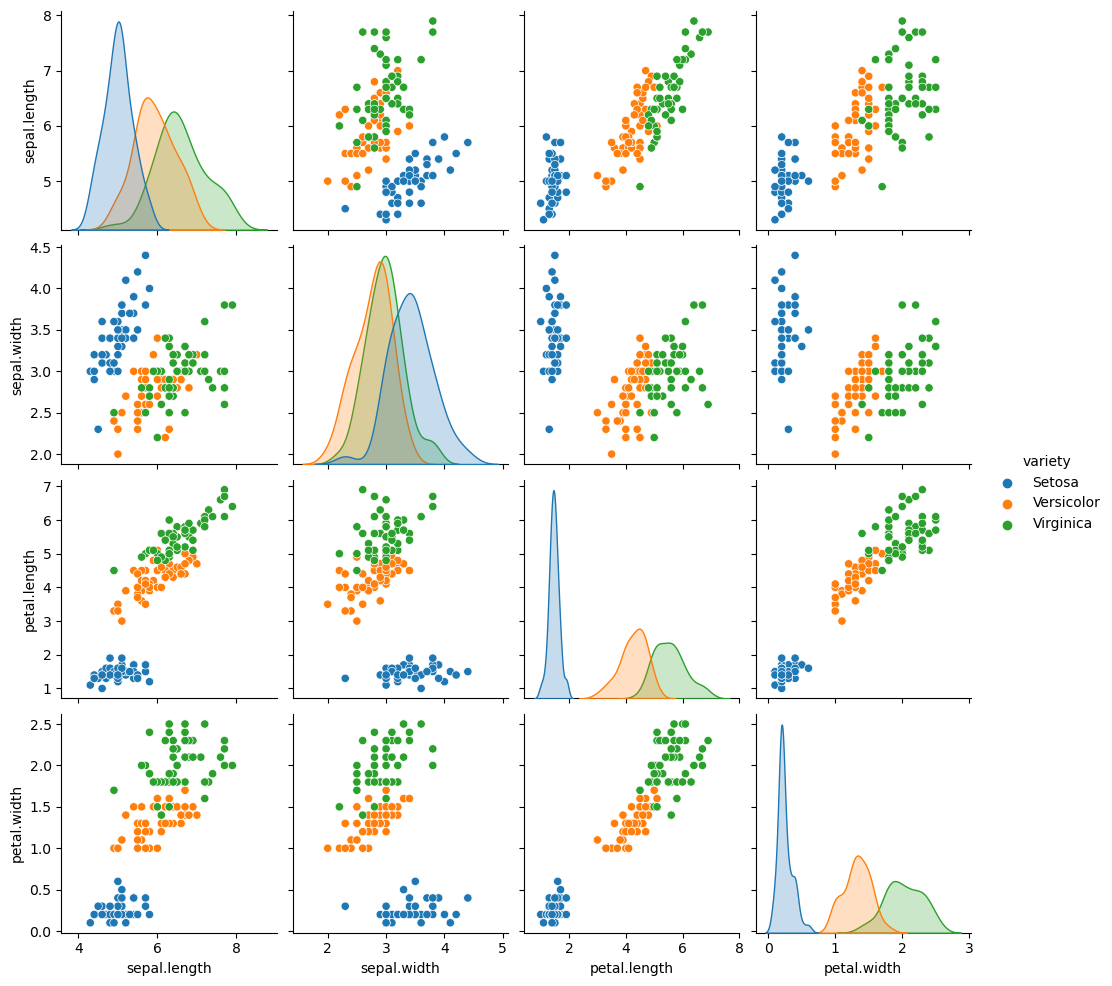

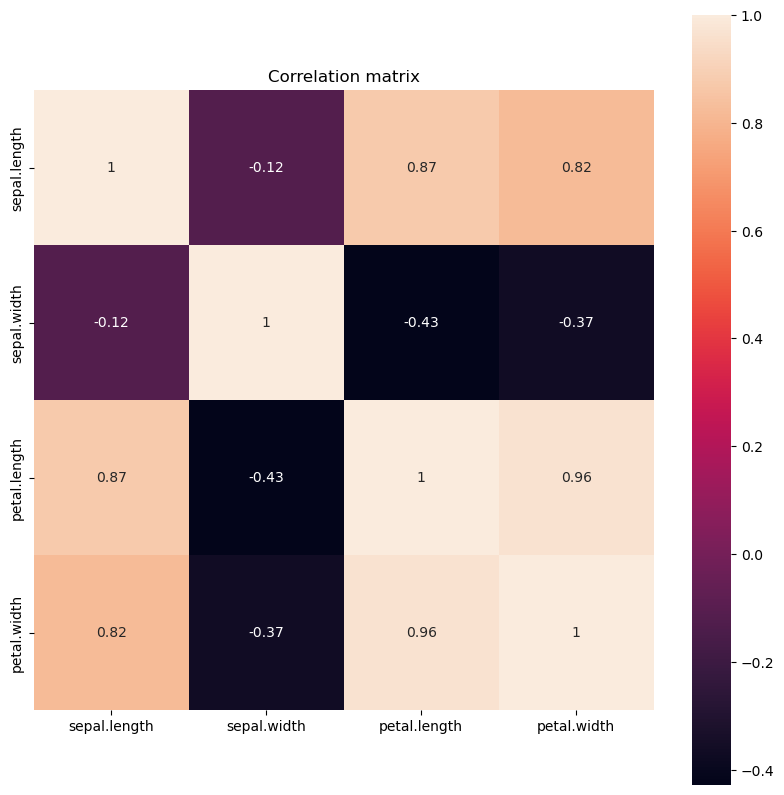

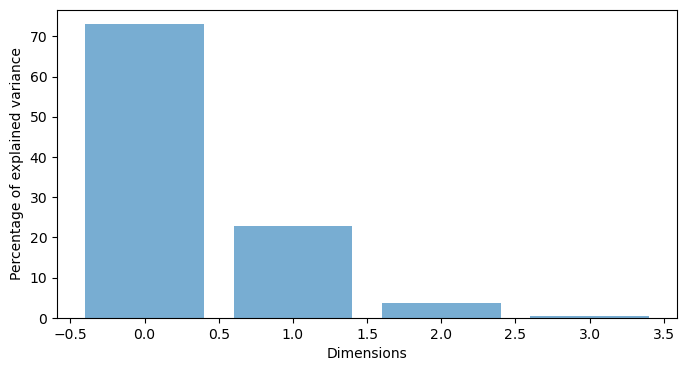

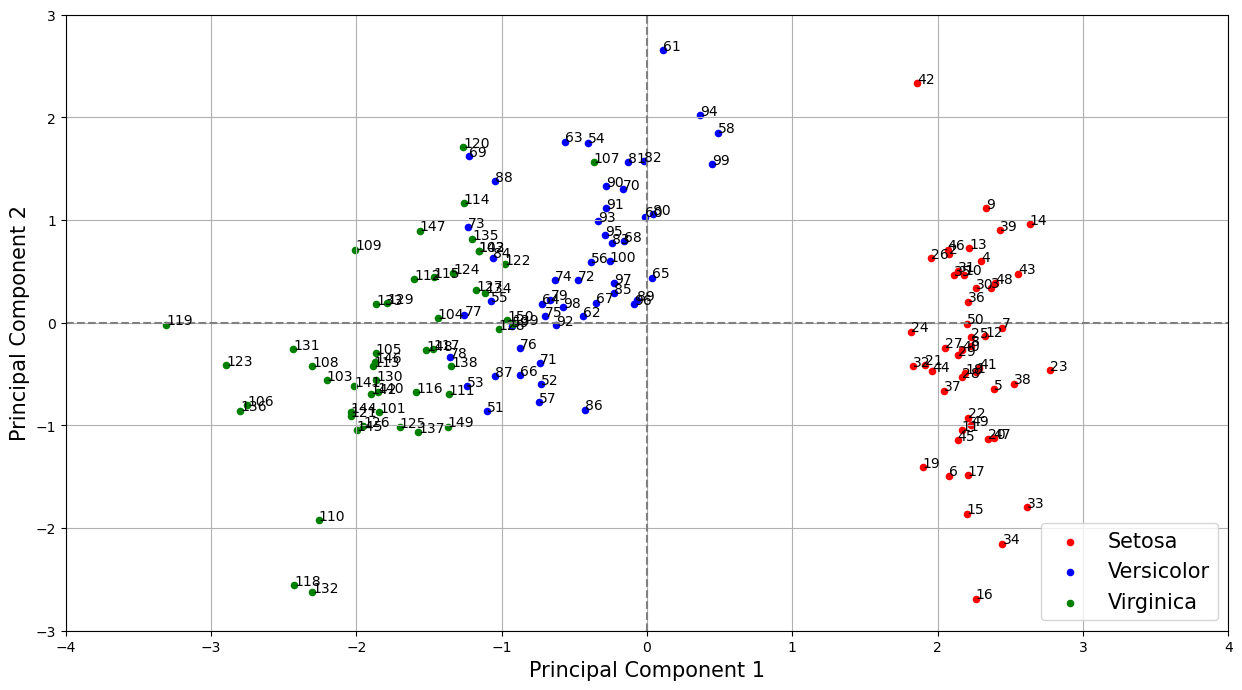

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Read csv data file, change to your location
df = pd.read_csv("C:\\Users\\TGDD\\Desktop\\học máy\\week5\\iris.csv")

# show data information
df
df.describe()
sns.pairplot(df, hue = 'variety')

# We're seperating the species column
species = df["variety"].tolist()
X = df.drop("variety", 1)
# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)
# Calculating the correlation matrix of the data
X_corr = (1 / 150) * X.T.dot(X)
# Plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')

# method1
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors
# method2
np.linalg.eig(X_corr)

# plotting the variance explained by each PC
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(4), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

# calculating our new axis
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])

# plotting in 2D
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    species_unique = list(set(species))
    species_colors = ["r","b","g"]
    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20,c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i+1), (pc1[i],pc2[i]))
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()
plot_scatter(pc1, pc2)

C:\Users\TGDD\AppData\Local\Temp\ipykernel_12704\179742773.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("variety", 1)


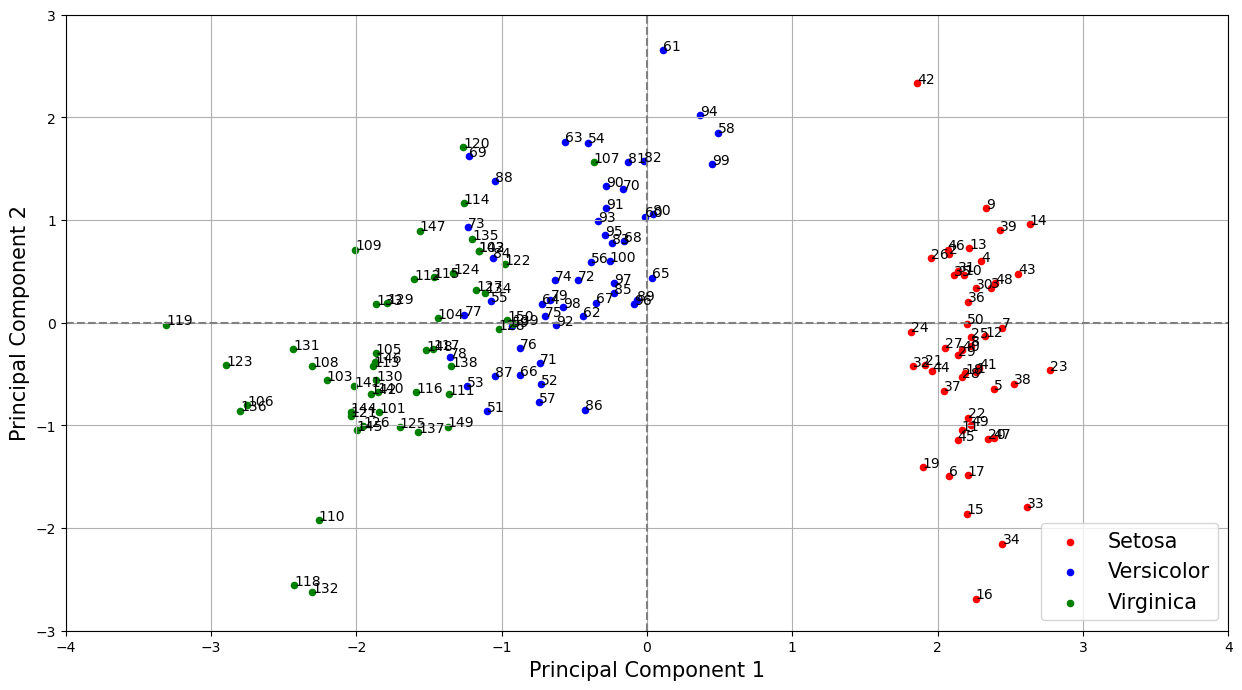

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Read csv data file, change to your location
df = pd.read_csv("C:\\Users\\TGDD\\Desktop\\học máy\\week5\\iris.csv")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.drop("variety", 1)
X = StandardScaler().fit_transform(X)
pca = PCA()
result = pca.fit_transform(X)
# Remember what we said about the sign of eigen vectors that might change ?
pc1 = - result[:,0]
pc2 = - result[:,1]
plot_scatter(pc1, pc2)

In [ ]:
#vd2

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df= pd.read_csv("C:\\Users\\TGDD\\Desktop\\học máy\\week5\\pd_speech_features.csv")
df.head()
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

In [ ]:
#1) Sử dụng đoạn code chọn số chiều chính trong ví dụ 2, đưa tập dữ liệu đã đọc về còn 2 chiều, sau đó hiển thị lên màn hình để xem quan hệ giữa các lớp dữ liệu.

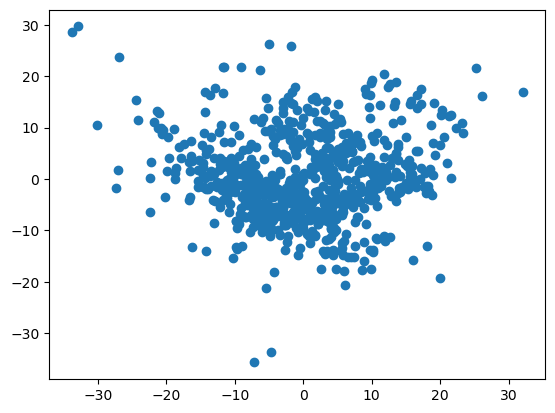

In [5]:
X = df.drop("class", axis=1)
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Remember what we said about the sign of eigen vectors that might change ?
pc1 = - result[:,0]
pc2 = - result[:,1]
plt.scatter(pc1, pc2)
plt.show()


In [ ]:
#2) Với đoạn chương trình đọc dữ liệu đã có, hãy chạy lại ví dụ này với các thư viện của gói linear_model, lớp LogisticRegression và so sánh kết quả, chia Train:Test = 4:1.

In [6]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, df['class'], test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_redict = model.predict(X_test)
print('Predicted labels: ', y_redict)

# Accuracy
print("Accuracy: ", accuracy_score(y_test, y_redict))

Predicted labels:  [0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1
 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 0]
Accuracy:  0.868421052631579


In [ ]:
#VD2
#1) Sử dụng PCA để giữ lại 200 thành phần chính của dữ liệu

In [7]:
# Using PCA to retain the 200 major components of the data
X = df.drop("class", axis=1)
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=200)
result = pca.fit_transform(X)
print('Shape of X: ', X.shape)

Shape of X:  (756, 754)


In [ ]:
'''2) Chia dữ liệu thành 500 bản ghi training và phần còn lại cho Test. Sau đó sử dụng mô hình hồi
quy Logistic để dự đoán phân loại dữ liệu cho phần Test.'''

In [8]:
# split data to 500 records training and the rest for Test
X_train = result[:500]
X_test = result[500:]
y_train = df['class'][:500]
y_test = df['class'][500:]

model = LogisticRegression()
model.fit(X_train, y_train)

y_redict = model.predict(X_test)
print('Predicted labels: ', y_redict)

Predicted labels:  [1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0
 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1
 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1]


In [ ]:
#3) Sử dụng độ đo tính chính xác trong sklearn để kiểm tra kết quả.

In [10]:
# Accuracy
print("Accuracy: ", accuracy_score(y_test, y_redict))

Accuracy:  0.8046875


In [ ]:
#Ví dụ 3 (Bài tập thực hành 2):

In [ ]:
'''1) Đọc dữ liệu ảnh, lấy tập dữ liệu 5000 ảnh bất kỳ;
giảm số chiều dữ liệu xuống còn 100 chiều (từ 28x28 = 784 chiều ban đầu).'''

In [13]:
import os
import numpy as np

# set names to the paths because they're too long
data_path = os.path.join(os.getcwd(), 'image data')

# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')

# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

def get_mnist_data(images_path,
                   labels_path,
                   num_images,
                   shuffle=False,
                   _is=True,
                   image_size=28):
    """
        This shuffle param is active when .gz is downloaded at:
            - 'http://yann.lecun.com/exdb/mnist/'
            - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip  # to decompress gz (zip) file

    # open file training to read training data
    f_images = gzip.open(images_path, 'r')

    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)

    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)

    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)

    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size)

    # Read labels
    f_labels = gzip.open(labels_path, 'r')
    f_labels.read(8)

    labels = np.zeros((real_num)).astype(np.int64)

    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)

        images = images[rand_id, :]
        labels = labels[rand_id, ]

    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

images, labels = get_mnist_data(train_images_path,
                                            train_labels_path,
                                            5000,
                                            shuffle=True)

from sklearn.decomposition import PCA

pca = PCA(n_components=100)
result = pca.fit_transform(images)

In [ ]:
'''2) Áp dụng phương pháp phân loại nhiều lớp Multinomial Logistic Regression (tham khảo bài trước) 
để phân loại để phân loại tập dữ liệu đã chọn trong ý 1), tỷ lệ train:validation là 0.7:0.3. 
Hãy so sánh kết quả (độ chính xác và thời gian) chạy mô hình phân loại trong hai trường hợp:
a) Dữ liệu nguyên bản (giữ nguyên 28x28 = 784 chiều)'''

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

X_train, X_test, y_train, y_test = train_test_split(images, labels, train_size=0.7, random_state=2)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=2)
start = time.time()
model.fit(X_train, y_train)
end = time.time()

y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Time: %s' % (end - start))

Accuracy: 0.8953333333333333
Time: 1.0450000762939453


In [ ]:
'''b) Dữ liệu đã qua giảm chiều (100 chiều). Chú ý cần thực hiện giảm chiều với tập ảnh trước,
sau đó mới chia thành tập train và validation.'''

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

X_train, X_test, y_train, y_test = train_test_split(result, labels, train_size=0.7, random_state=2)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=2)
start = time.time()
model.fit(X_train, y_train)
end = time.time()

y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Time: %s' % (end - start))

Accuracy: 0.8626666666666667
Time: 0.27400636672973633
